# Практика #2

In [2]:
def showMatrix(m):
    for i in m:
        for j in i:
            print(f"{round(j,2)}", end=f"\t")
        print()


def showMatrixBig(m):
    for i in m:
        for j in i:
            print("{:.5e}".format(j), end=f"\t")
        print()


def showList(m):
    for i in m:
        print(f"{round(i,2)}", end=f"\t")
    print()


def showListBig(m):
    for i in m:
        print("{:.5e}".format(i), end=f"\t")
    print()

In [3]:
import scipy
import sympy
from scipy.misc import derivative
from scipy.optimize import Bounds, minimize, LinearConstraint
from sympy import diff, symbols, tan
from scipy import integrate
import math
import numpy as np

1. Найдите первую и вторую производные функции y в заданной точке x0
для своего варианта с помощью scipy. Вариантов меньше, чем
студентов. Ваш вариант – это остаток от деления вашего номера в
группе на количество вариантов.

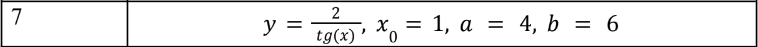

In [4]:
def first_task():
    def function(x):
        return 2 / np.tan(x)

    print(derivative(function, 1, n=1))
    print(derivative(function, 1, n=2))


first_task()

-inf
inf


C:\Users\vlszg\AppData\Local\Temp\ipykernel_9988\3514235699.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(derivative(function, 1, n=1))
C:\Users\vlszg\AppData\Local\Temp\ipykernel_9988\3514235699.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 / np.tan(x)
C:\Users\vlszg\AppData\Local\Temp\ipykernel_9988\3514235699.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(derivative(function, 1, n=2))


2. Используя функцию из таблицы выше для вашего варианта и пакет
sympy выведите на экран символьное представление производной.

In [5]:
def second_task():
    x = symbols("x")
    function = 2 / tan(x)
    first = diff(function)
    second = diff(first)
    print(first)
    print(second)


second_task()

2*(-tan(x)**2 - 1)/tan(x)**2
2*(-2*tan(x)**2 - 2)*(-tan(x)**2 - 1)/tan(x)**3 - 2*(2*tan(x)**2 + 2)/tan(x)


3. Вычислите определенный интеграл от a до b с помощью scipy функции
для своего варианта. Интеграл вычислите методом прямоугольников.

In [6]:
def third_task():
    def function(x):
        return 2 / tan(x)

    a, b = 4.0, 6.0
    result = integrate.quad(function, a, b)
    return result


showListBig(third_task())

-1.99280e+00	1.19424e-09	


4. С помощью sympy выведите на экран неопределенный интеграл
функции y для вашего варианта.

In [7]:
def fourth_task():
    x = symbols("x")
    function = 2 / tan(x)
    print(sympy.integrate(function))


fourth_task()

2*log(sin(x))


5. Решите задачу нелинейной оптимизации для вашего варианта.
Выведите оптимальное значение и решение.

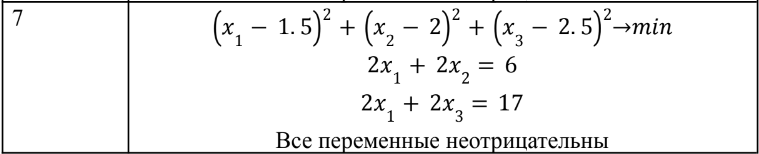

In [8]:
def fifth_task():
    def objective(x):  # целевая функция
        return (x[0] - 1.5) ** 2 + (x[1] - 2) ** 2 + (x[2] - 2.5) ** 2

    def constraint1(x):  # ограничения
        return 2 * x[0] + 2 * x[1] - 6

    def constraint2(x):
        return 2 * x[0] + 2 * x[2] - 17

    x0 = np.zeros(
        3
    )  # первоначальная догадка. Массив вещественных элементов размера (n,), где — количество независимых переменных.n
    b = (0, np.inf)
    bnds = (b, b, b)
    con1 = {"type": "eq", "fun": constraint1}
    con2 = {"type": "eq", "fun": constraint2}
    cons = [con1, con2]
    solution = minimize(objective, x0, method="SLSQP", bounds=bnds, constraints=cons)
    x = solution.x
    print(solution)
    print("Final: " + str(round(objective(x), 3)))
    print("x1 = " + str(round(x[0], 3)))
    print("x2 = " + str(round(x[1], 3)))
    print("x3 = " + str(round(x[2], 3)))


fifth_task()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 15.166666666666664
       x: [ 2.833e+00  1.667e-01  5.667e+00]
     nit: 4
     jac: [ 2.667e+00 -3.667e+00  6.333e+00]
    nfev: 16
    njev: 4
Final: 15.167
x1 = 2.833
x2 = 0.167
x3 = 5.667
